<a href="https://colab.research.google.com/github/trahulrao85/helloworld/blob/master/Jumbotree_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jumbotree Analysis

### It is an platform which helps students to get admission in the top tier colleges across the world. The sample data given belongs to the students who provide various information and based on the perforamnce against those parameters, it gives an approximate decision or probability of chances of admission.

### The objective is to:
*   Carry out the Exploratory Data Analysis
*   Derive the correlation between the independent variables
*   Model Linear Regression and check for its assumptions
*   Evaluate the model using metrics like MAE, RMSE, R2Square and Adjusted R2Square

### The data consists of following independent features:
- GRE Scores
- TOEFL Scores
- University Rating
- Statement of Purpose and Letter of Reccomendation Strength
- Undergraduate GPA
- Research Experience

### Chance of admit is the dependent variable




## Data Upload and Understanding the Dataset

In [129]:
# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [51]:
# Loading the Dataset

!gdown --output Admission_Predict.csv https://drive.google.com/uc?id=1QqaZ1s8n9V2-s_WwKDycsZyExEcaHskT

df = pd.read_csv('Admission_Predict.csv')
print(df.head())

Downloading...
From: https://drive.google.com/uc?id=1QqaZ1s8n9V2-s_WwKDycsZyExEcaHskT
To: /content/Admission_Predict.csv
100% 16.2k/16.2k [00:00<00:00, 28.5MB/s]
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [52]:
# Lets look at the shape of the dataset

df.shape

(500, 9)

In [53]:
# The dataset is having 500 rows and 9 columns which is a combination of independent and dependent features
# Lets look at the columns and their data types

In [54]:
# Columns data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [55]:
# All the columns are either in Integer or Float, so there is no need to use encoding techniques
# Also, there are no-null values, hence null value treament is not required
# Lets look at the statisical summary of the data

In [56]:
# Statistical summary

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [57]:
# GRE Scores - Mean (316) and 50% value (317) are both approximately equal which means that there are no outliers in the column.
# GRE Scores - Range is between 290 and 340 with standard deviation of 11.29, which indicates a hint of high variance in the dataset
# TOEFL Score - Mean (107) and 50% value (107) are both equal which means that there are no outliers in the column.
# TOEFL Scores - Range is between 92 and 120 with standard deviation of 6.08, which indicates a low variance in the dataset
# University rating - Range is between 1 to 5, with mean of 3.14, which means most of the universities has more than 3 rating
# SOP and LOR - Both have mean of 3.37 and 3.48 again and if its compared to 50% i.e. 3.5, which means most of the students have a good statemen of purpose and letter of recommendation
# CGPA - The range is from 6.8 to 9.92, with a standard deviation of 0.6, which indicates that most of the datapoints are located near the mean and hence low variance in the dataset
# Chances of Admit - This is target column with range of 0.34 to 0.97 with median at 0.72, which indicates less variance and most of the studuents have good chances of getting admission into their desired college
# Research Experience: we can see its mean is 0.56, which indicates that 56% of the students in the dataset have research experience (since it's a binary 0/1 column). This is a crucial insight into the student demographic.

## Data Pre-Processing

In [58]:
# Encoding: We dont require to do encoding as all the features are integer or numeric
# Missing Value: As there are no missing values, hence Missing Value treatment is not required

In [59]:
# Duplicate value check

df.duplicated().sum()

np.int64(0)

In [60]:
# Its clear from the above that there are no duplicated values
# Let go with the outlier treatment

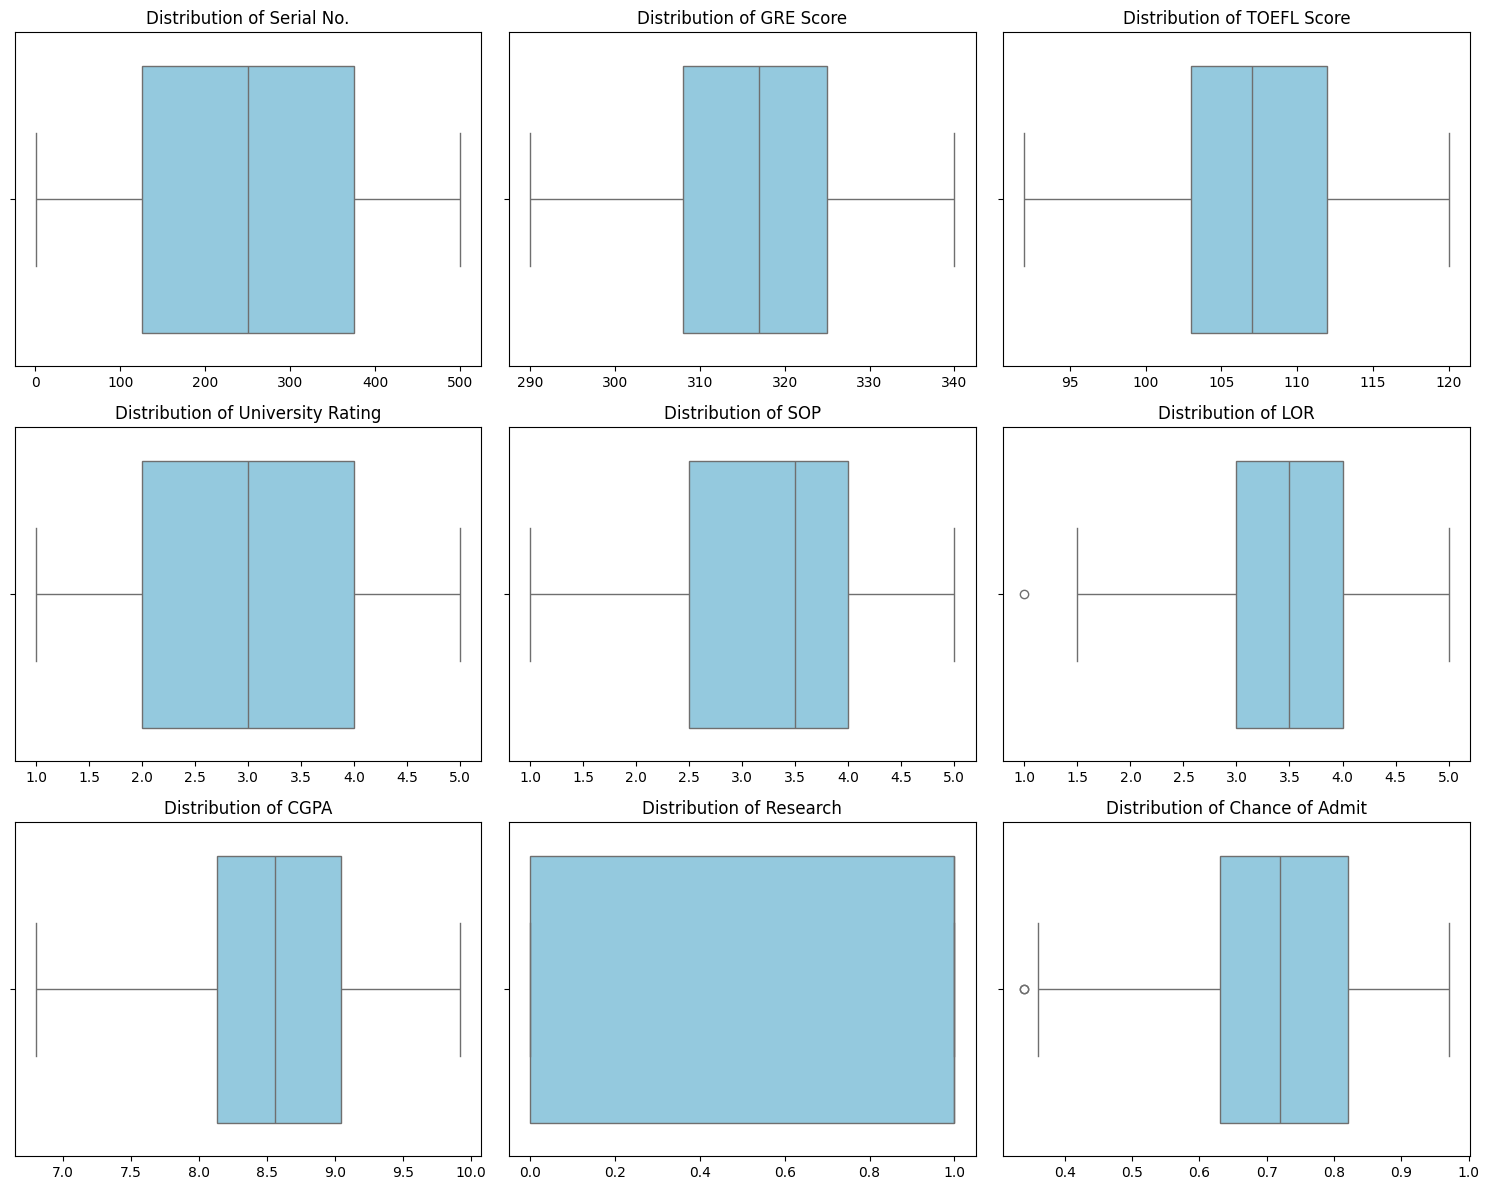

In [61]:
# Box plot

# Removing trail spaces from the name of the columns
df.columns = df.columns.str.strip()


# Taking only numeric features
features = df.select_dtypes(include = ['float64','int64']).columns.tolist()


# Calculating grid dimensions dynamically
n_features = len(features)
cols = 3
rows = math.ceil(n_features/cols)

# Ploting the box olot

fig,axes = plt.subplots(rows,cols,figsize=(15,rows*4))
axes = axes.flatten()

for i,col_name in enumerate(features):
  sns.boxplot(data=df,x=col_name,ax = axes[i],color='skyblue')
  axes[i].set_title(f'Distribution of {col_name}',fontsize = 12)
  axes[i].set_xlabel('')

for j in range(i+1,len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# There is an single outlier in LOR and Chance of Admit, out of dataset of 500, so we can ignore it rather than treating it

In [62]:
# Dropping Serial Number Column

df = df.drop('Serial No.',axis=1)

## Data Visualisation

In [ ]:
# Univariatate Analysis
# - GRE Scores
# - TOEFL Score
# - Undergraduate GPA

<Axes: xlabel='GRE Score', ylabel='Count'>

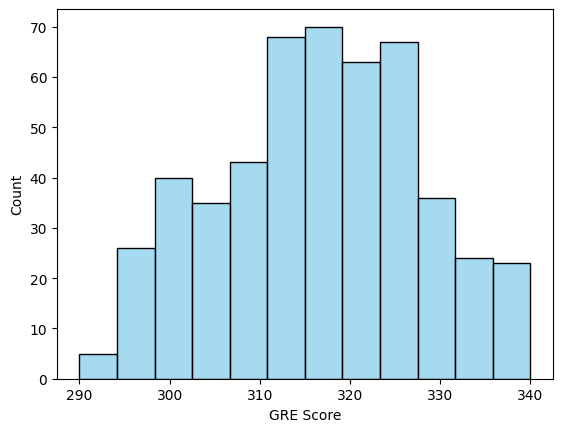

In [67]:
# GRE Scores

sns.histplot(data = df, x = 'GRE Score',color = 'skyblue')

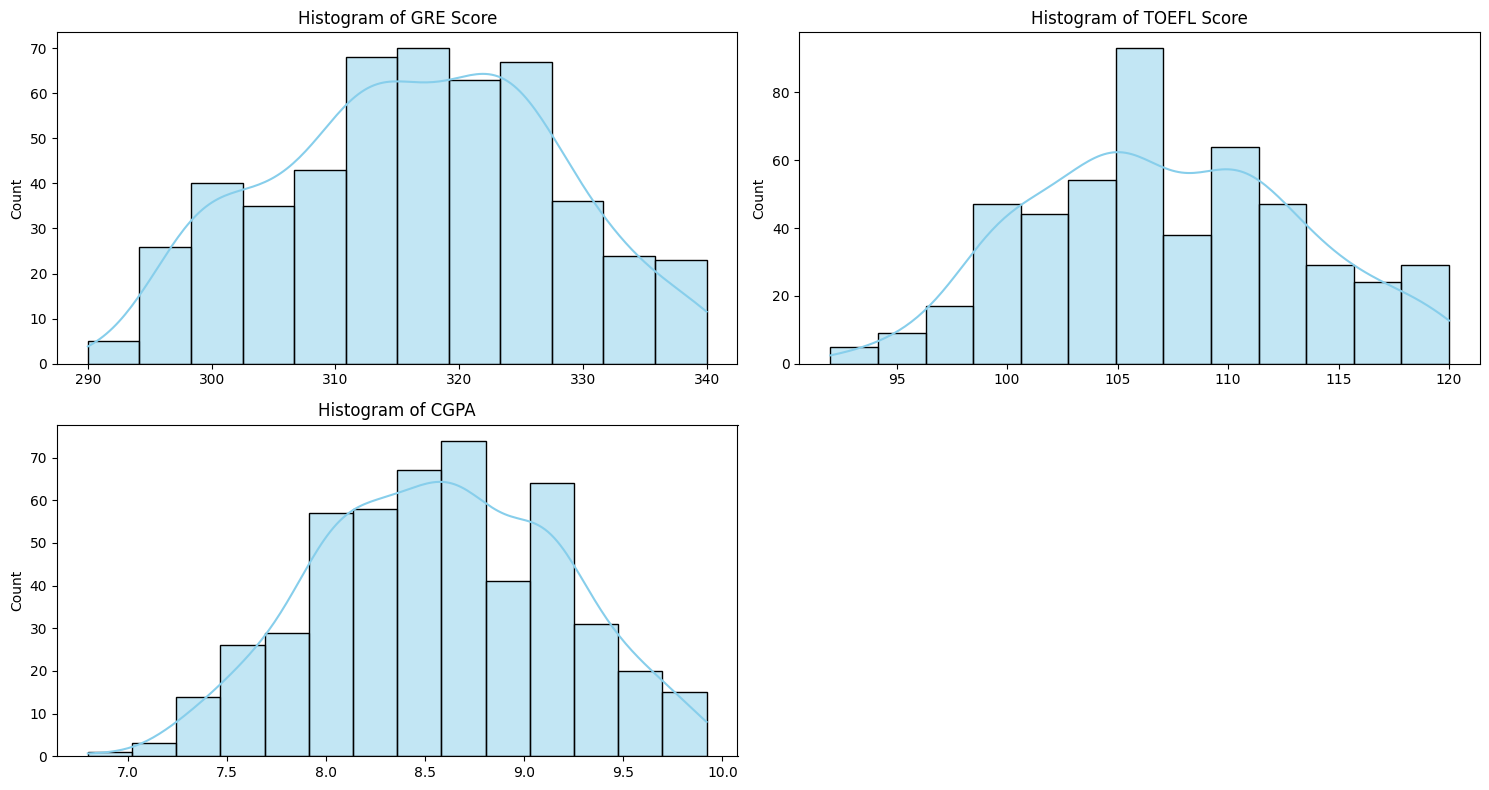

In [75]:
uni_features = ['GRE Score','TOEFL Score','CGPA']

n_features1 = len(uni_features)
cols = 2
rows = math.ceil(n_features1/cols)

fig,axes = plt.subplots(rows,cols,figsize=(15,rows*4))
axes = axes.flatten()

for i,col_name in enumerate(uni_features):
  sns.histplot(data = df, x = col_name,ax = axes[i],color = 'skyblue',kde='True')
  axes[i].set_title(f'Histogram of {col_name}',fontsize = 12)
  axes[i].set_xlabel('')


for j in range(i+1,len(axes)):
  axes[j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# GRE Score and TOEFL Score is visually looking like a normal distribution and CGPA is slightly left skewed
# GRE Score : Maximum data is distributed between 310 to 325
# TOEFL Score: Maximum datapoints is centered and is around 107-108

In [ ]:
# Bivariate Analysis:

# - GRE and CGPA
# - TOELF and CGPA
# - GRE Score and TOEFL Score
# - rating vs GRE scores
# - rating vs TOEFL scores

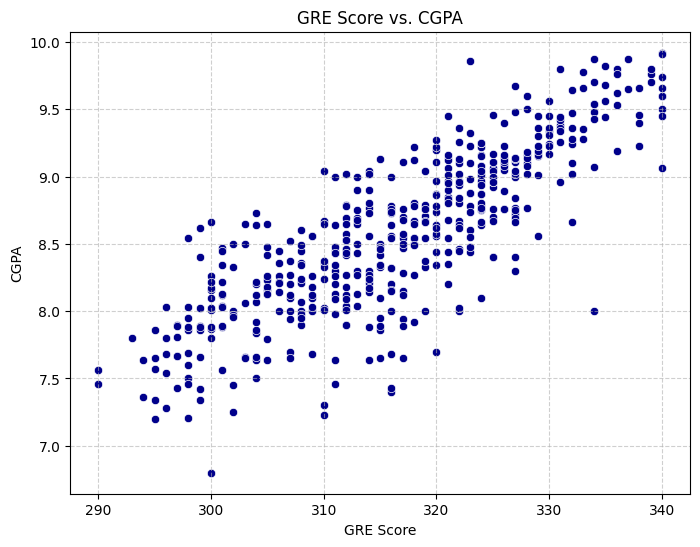

In [78]:
# Bivariate Analysis: GRE vs CGPA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GRE Score', y='CGPA', color='darkblue')
plt.title('GRE Score vs. CGPA')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

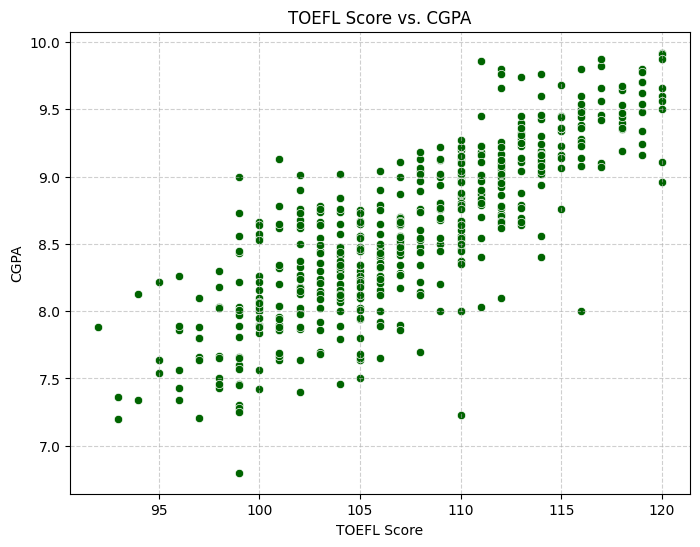

In [79]:
# Bivariate Analysis: TOEFL vs CGPA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TOEFL Score', y='CGPA', color='darkgreen')
plt.title('TOEFL Score vs. CGPA')
plt.xlabel('TOEFL Score')
plt.ylabel('CGPA')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

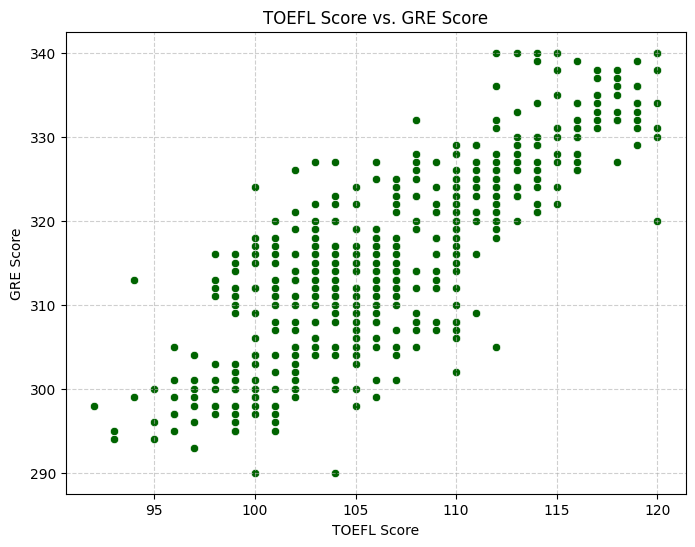

In [80]:
# Bivariate Analysis: TOEFL vs GRE Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TOEFL Score', y='GRE Score', color='darkgreen')
plt.title('TOEFL Score vs. GRE Score')
plt.xlabel('TOEFL Score')
plt.ylabel('GRE Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [82]:
# From the above graphs its very clear that
# - Students with higher CGPA, often score good marks in GRE exams
# - Similarly students with higher CGPS, score good marks in TOEFL exams
# - Since TOEFL and GRE are very closely related, hence it was expected to have a strong positive correlation and its evident from the graph

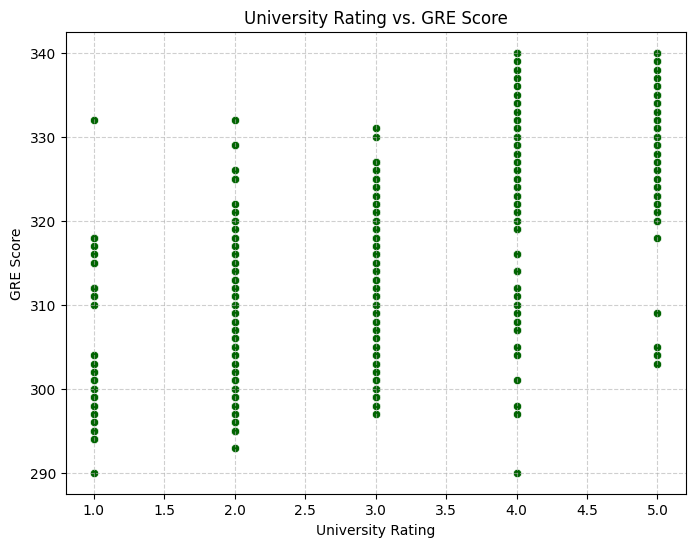

In [85]:
# Bivariate Analysis: Rating vs GRE Score

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='University Rating', y='GRE Score', color='darkgreen')
plt.title('University Rating vs. GRE Score')
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [86]:
# We cannot draw any inference out of thos graph

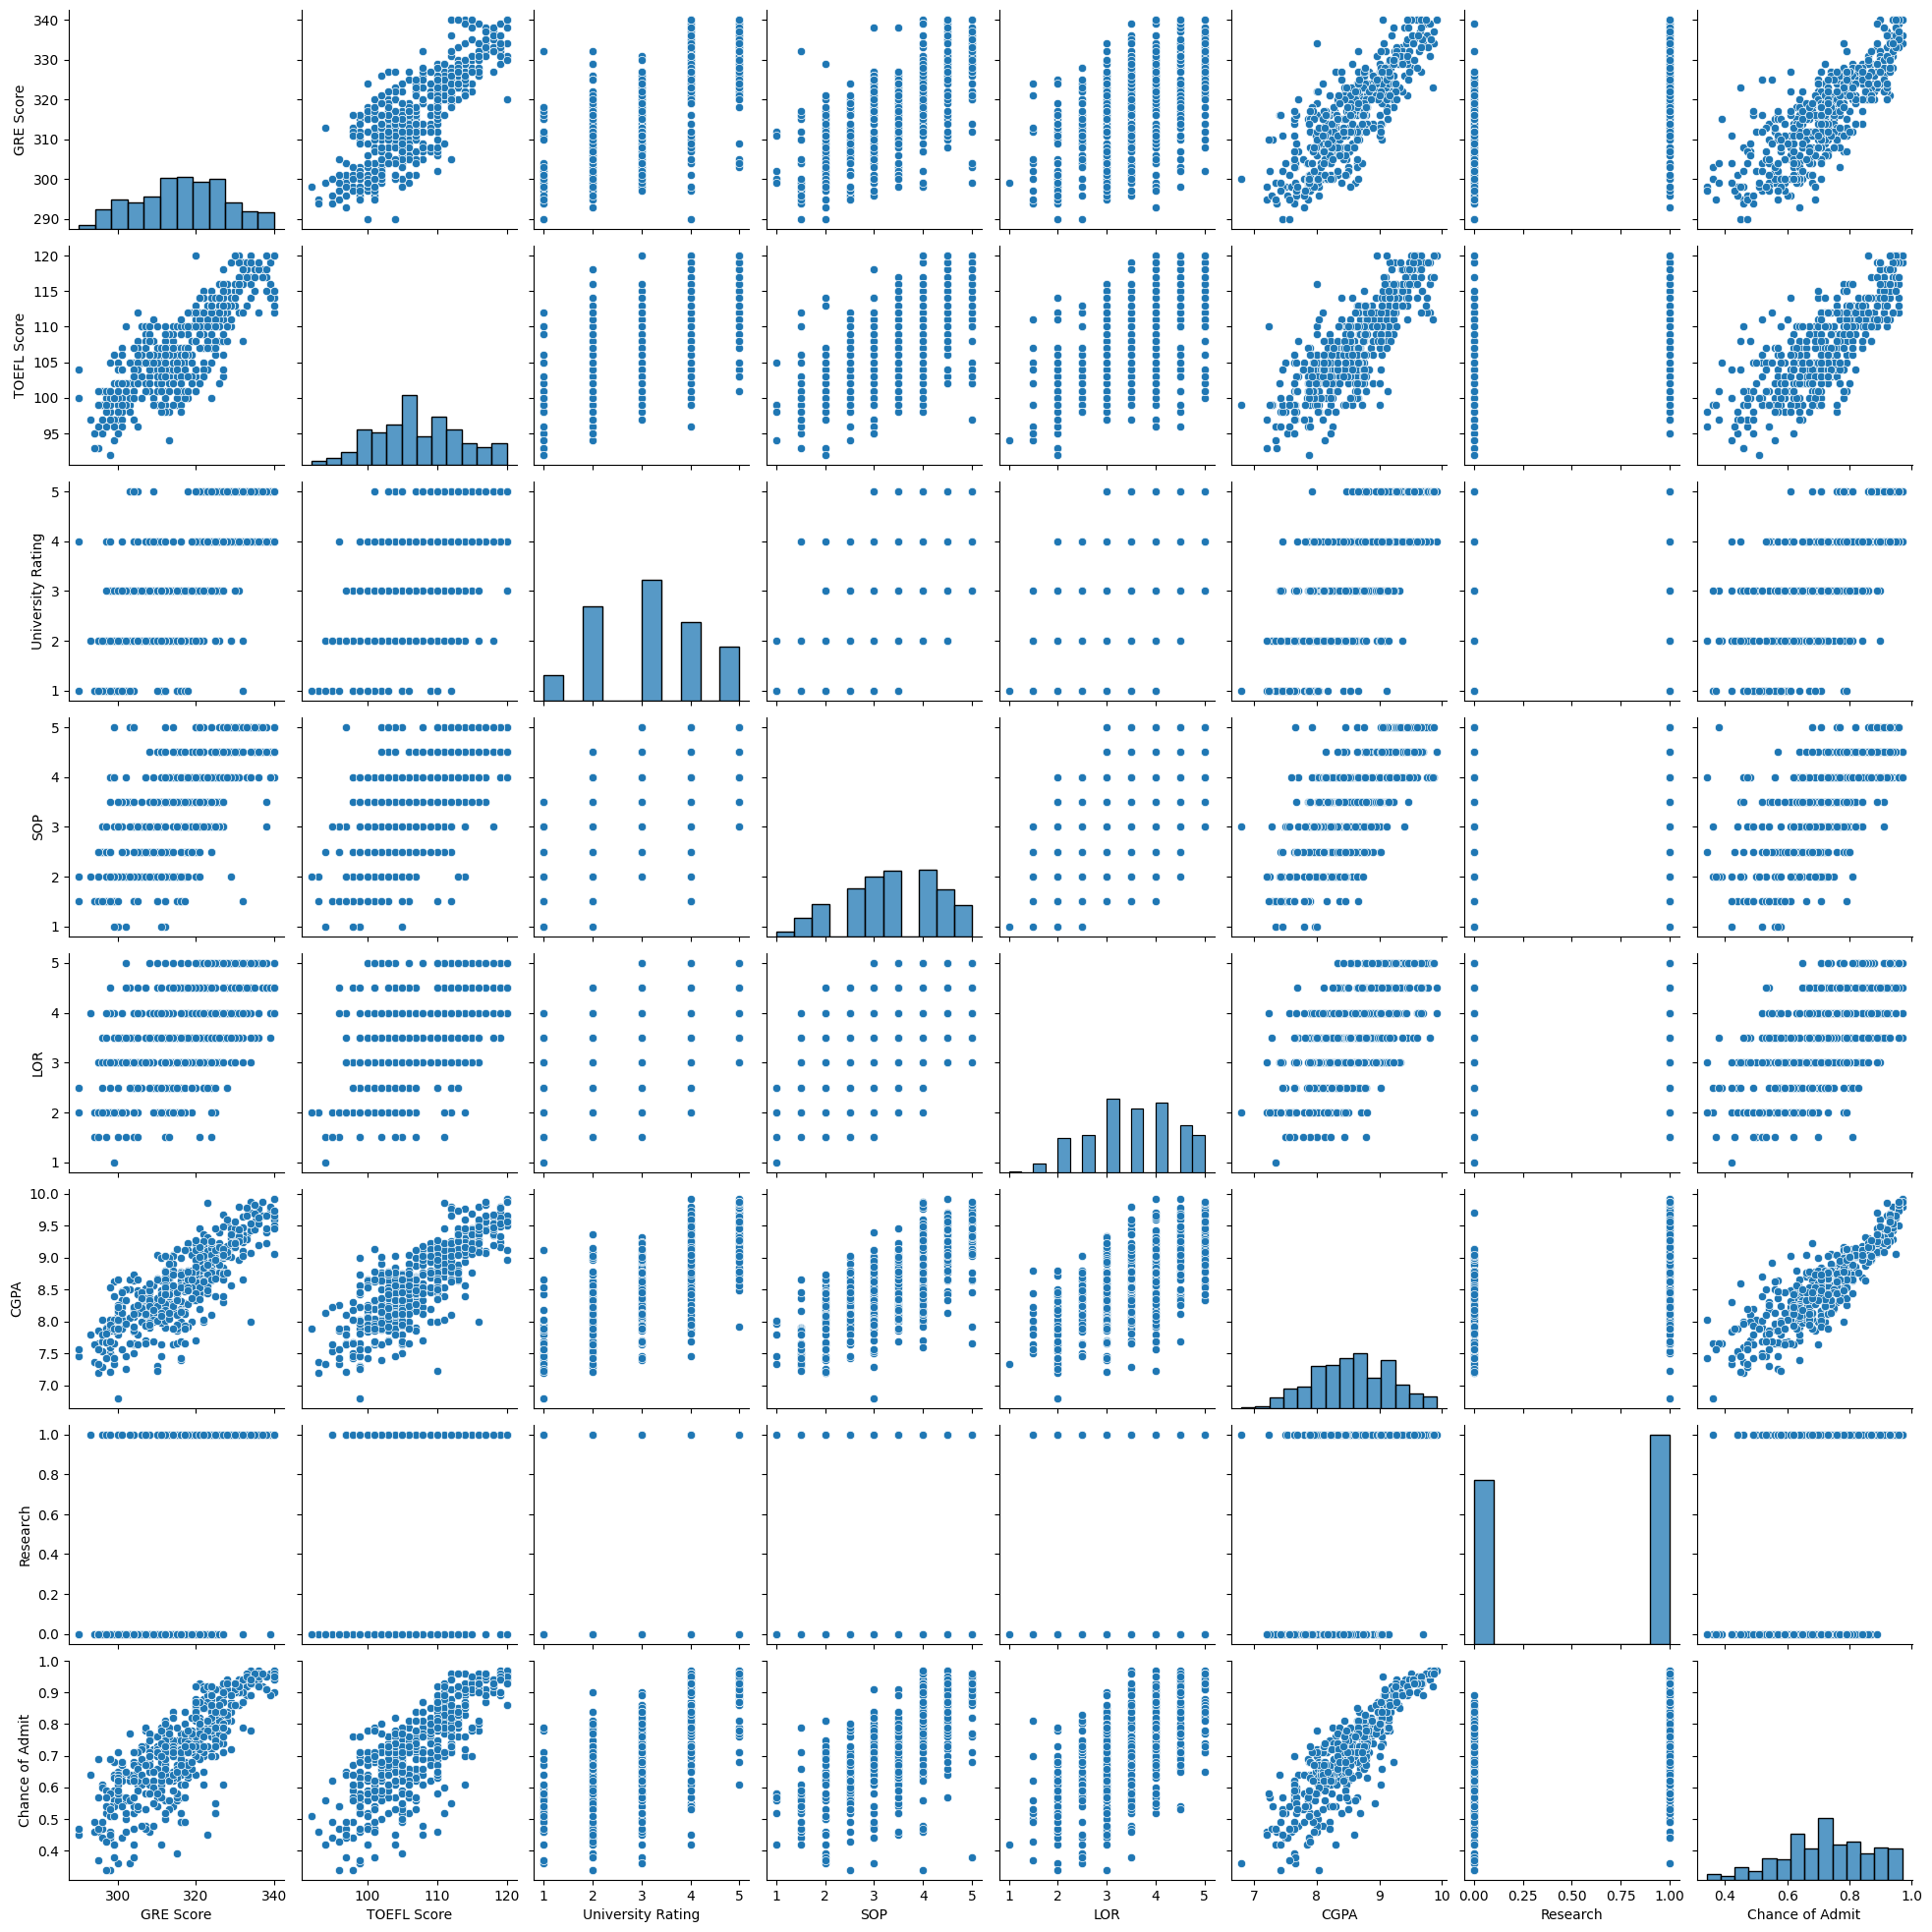

In [88]:
# Lets look at the pair plot

sns.pairplot(df)

In [ ]:
# SOP, LOR and University Ratings will not be useful to find out the relationship with other variables as they have limited values
# Chance of Admit is strongly positively correlated with GRE Score, TOEFL Score, CGPA
# University Rating also shows a clear relationship. Students with higher university ratings tend to have higher GRE, TOEFL, CGPA, and 'Chance of Admit'. This is visible as distinct clusters or shifts in the data for each rating level.
# Research Experience: The pairplot shows that students with Research = 1 (have research experience) tend to have higher GRE, TOEFL, CGPA, and 'Chance of Admit' compared to those with Research = 0. This is a crucial binary feature that seems to have a strong positive association.

<Axes: xlabel='GRE Score', ylabel='TOEFL Score'>

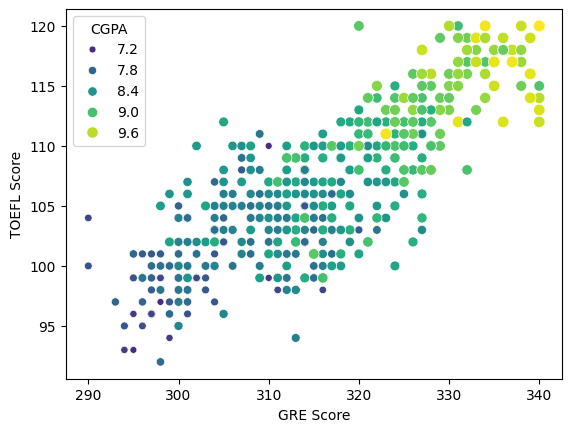

In [90]:
# Multi Variate Analysis between CGPA, GRE and TOEFL Score

sns.scatterplot(data = df,x = 'GRE Score', y= 'TOEFL Score', hue = 'CGPA',size='CGPA',palette='viridis')

In [ ]:
# This clearly shows that the students who are scoring high CGPA, tends to do well in GRE and TOEFL also.

## Data Modeling and Applying Linear Regression

In [150]:
# Seggregating independent and dependent variables

X = df.drop('Chance of Admit',axis=1)
y = df['Chance of Admit']

In [151]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [152]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [154]:
# Scaling the X dataframe

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


<Axes: >

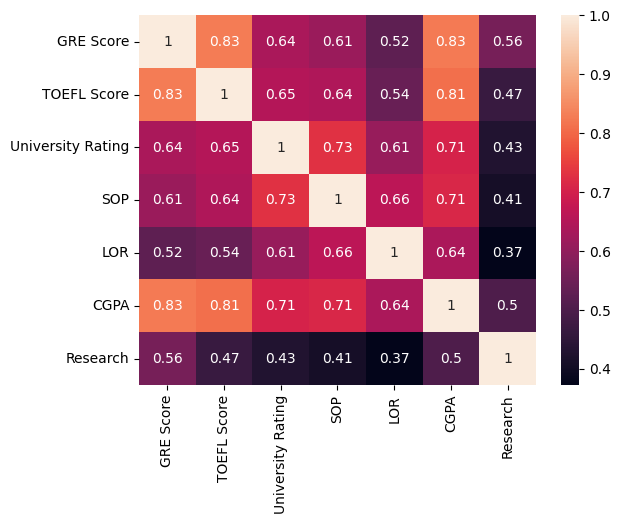

In [155]:
# Looking at the correlation between independent variables

sns.heatmap(X_scaled.corr(),annot = True)

In [144]:
# from the heatmap its clear that there is a stron correlation between
# The same was evident from pair plot also

# - GRE Score and TOEFL Score
# - GRE Score and CGPA
# - TOEFL Score and CGPA

In [156]:
# Splitting test and train dataset

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)

In [157]:
# Checking the shape of train and test data sets

print(f'X_train_shape: {X_train.shape},X_test_shape: {X_test.shape}')
print(f'y_train_shape: {y_train.shape},y_test_shape: {y_test.shape}')


X_train_shape: (400, 7),X_test_shape: (100, 7)
y_train_shape: (400,),y_test_shape: (100,)


In [158]:
# Lets implement Linear Regression from statsmodel library

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [159]:
# Predicting the y values

y_predict = model.predict(X_test)

In [160]:
# Model Evaluation:

print(f'MAE: {mean_absolute_error(y_test,y_predict)}')
print(f'MSE: {mean_squared_error(y_test,y_predict)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_predict))}')
print(f'R2: {r2_score(y_test,y_predict)}')
print(f'Adjusted R-square: {1-(((1-r2_score(y_test,y_predict))*(len(y_test)-1)) / (len(y_test)- X_test.shape[1]-1))}')

MAE: 0.040200193804157944
MSE: 0.003459098897136383
RMSE: 0.05881410457650769
R2: 0.8208741703103732
Adjusted R-square: 0.8072450310948581


In [161]:
# MAE and MSE both are low which indicates that model's predicition is very good and off by 4%
# Also, when we look at the adjusted r-square and r-square scores, its also more than 80%,
# which advocates the accuracy of the model

In [162]:
# Checking the weight coefficients

for i in range(len(X_train.columns)):
  print(f'{X_train.columns[i]}: {np.round(model.coef_[i],4)}')

GRE Score: 0.0207
TOEFL Score: 0.0193
University Rating: 0.007
SOP: 0.003
LOR: 0.0133
CGPA: 0.0705
Research: 0.0099


In [165]:
# CGPA - This is the largest coefficient. For every one-point increase in CGPA,the 'Chance of Admit' increases by
# approximately 0.07 (or 7%). This indicates that CGPA has the strongest positive impact on the
# 'Chance of Admit' among all features and its followed by GRE Score and TOEFL Score (2%)

In [166]:
# Checking the intercept

model.intercept_

np.float64(0.7228813180778462)

In [167]:
# Checking the corelation between the independent variables


vif_series = pd.Series([variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])])
vif_series

,0
0,4.873265
1,4.243883
2,2.798252
3,2.920046
4,2.079334
5,4.751389
6,1.508148


In [168]:
# Since all features have VIF value of less than 5, so no features needs to be dropped

In [174]:
# Testing the assumptions of linear regression

# 1. Mean of Residuals # It should be very close to 0

residuals = y_test - y_predict
res = stats.shapiro(residuals)
res.statistic

Mean of Residuals: -0.005706590389232242


np.float64(0.8361674437632513)

In [ ]:
# Since the value is close to zero hence its an indication of normality

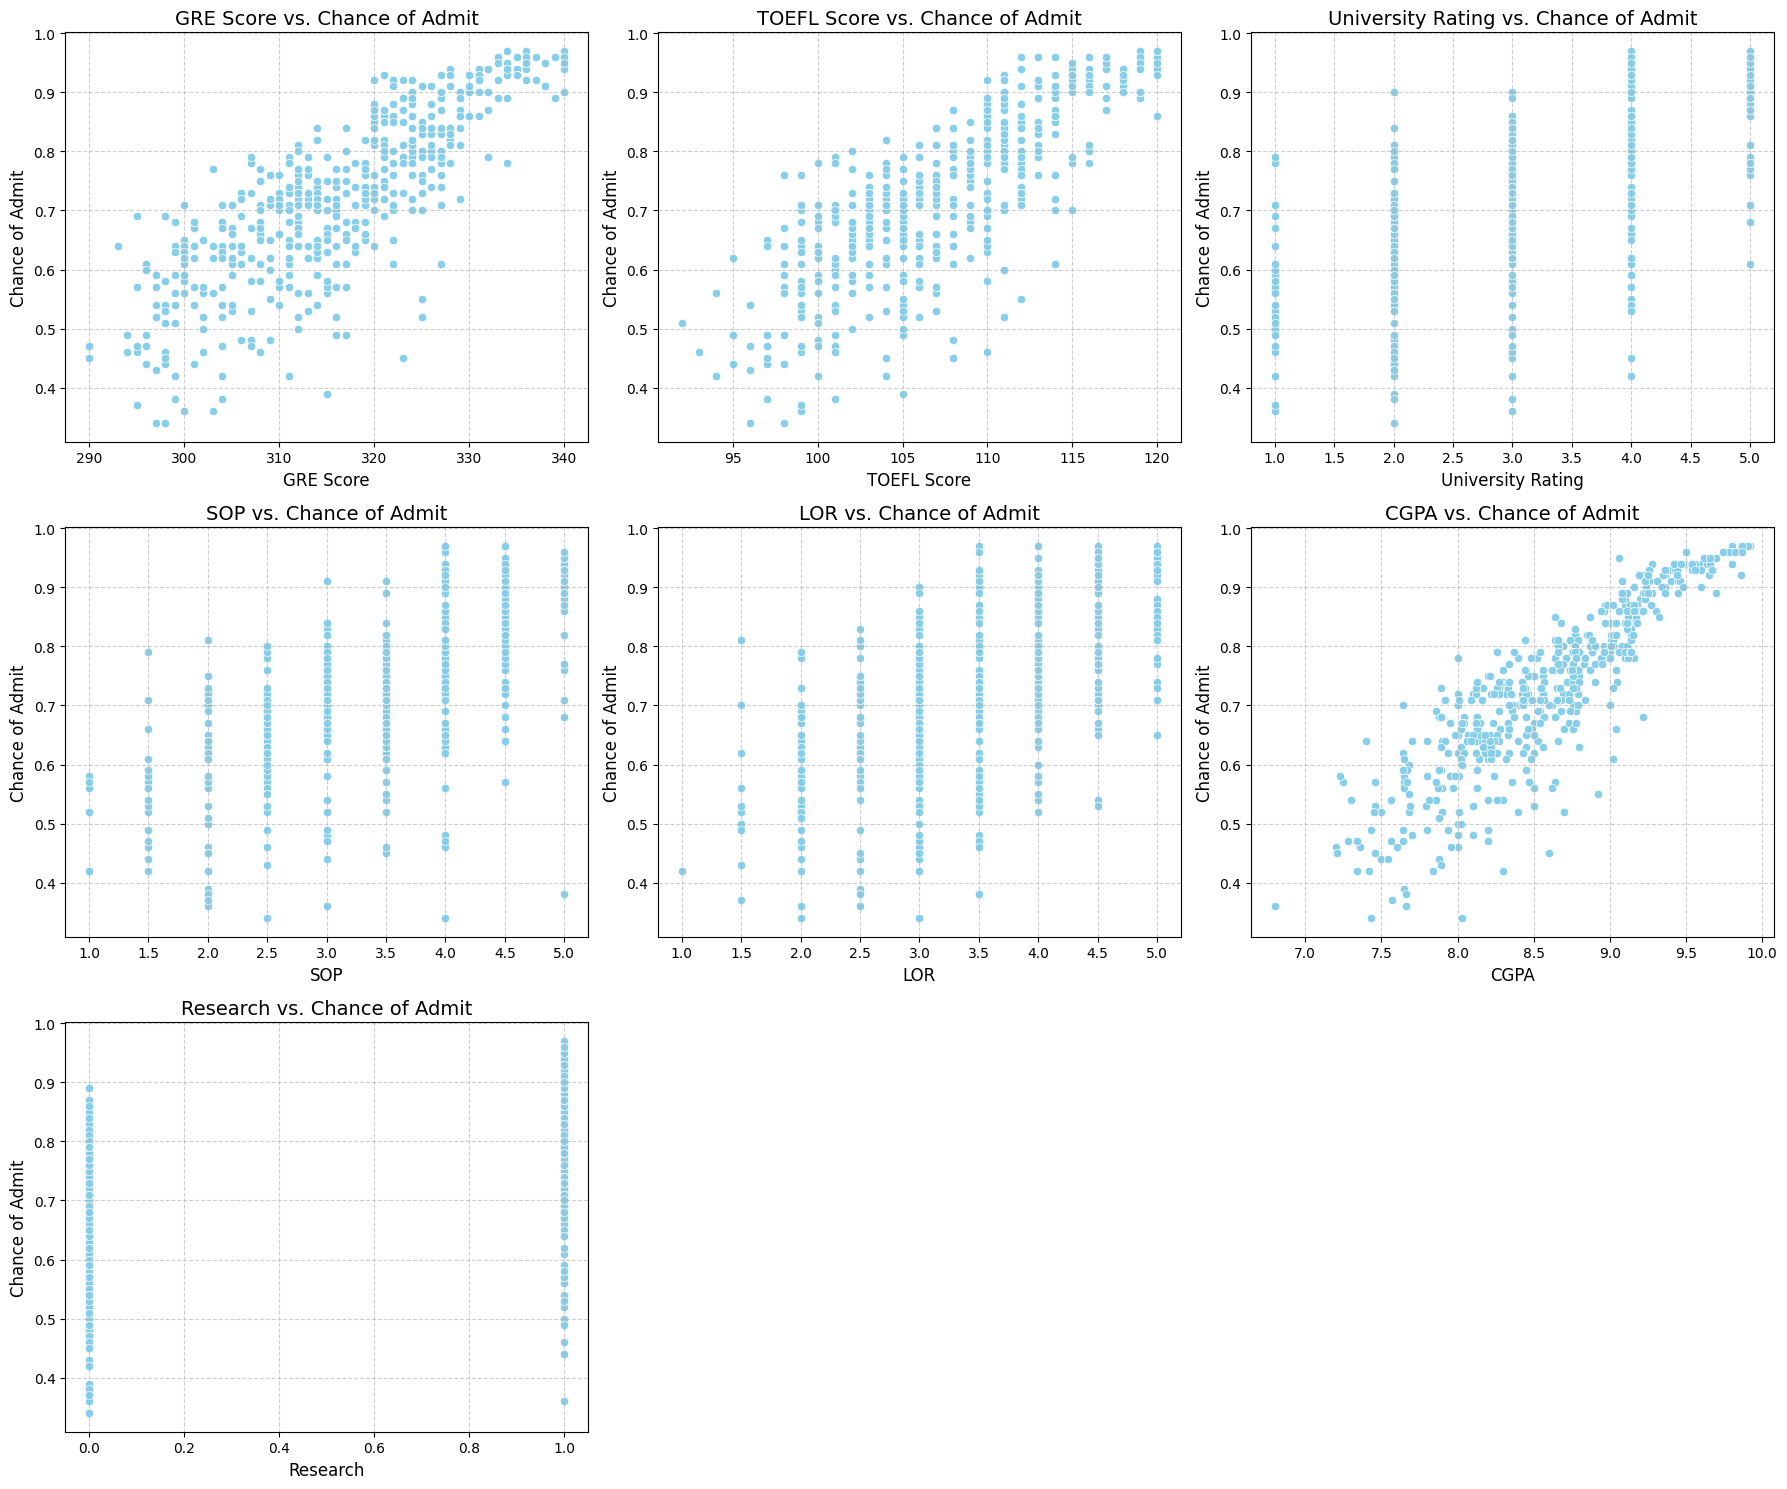

In [173]:
# 2. CHecking the linearity

# Get the list of independent variable columns
independent_vars = X.columns

# Calculate grid dimensions dynamically
n_vars = len(independent_vars)
cols = 3  # You can adjust this for better layout
rows = math.ceil(n_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col_name in enumerate(independent_vars):
    sns.scatterplot(data=df, x=col_name, y='Chance of Admit', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col_name} vs. Chance of Admit', fontsize=14)
    axes[i].set_xlabel(col_name, fontsize=12)
    axes[i].set_ylabel('Chance of Admit', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [177]:
# All the independent variables are having linear relationship with dependent variables.
# And upon close observation w can find that SOP, LOR, Research although they have discrete
# values but still they are increase with the increase in y

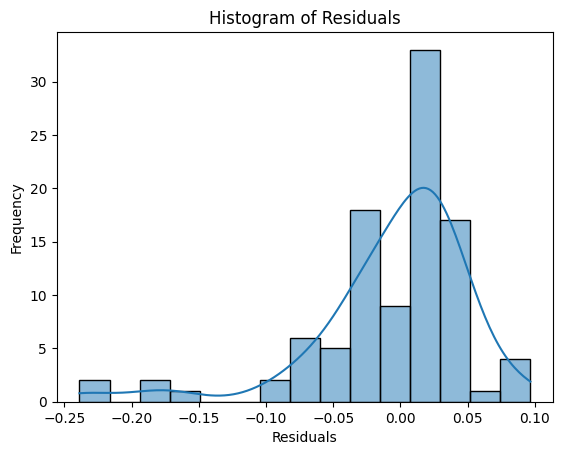

In [179]:
# 3. Normality of the residuals

sns.histplot(residuals,kde = True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

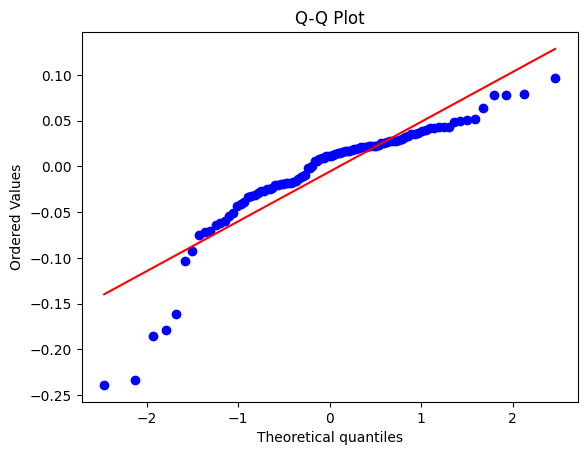

In [184]:
from scipy import stats
stats.probplot(residuals,dist = "norm",plot = plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
# # Looking at QQ plot, we can observe that the points deviate from the straight line, especially at the tails.
# This confirms with the earlier observation from the histogram: the residuals are not perfectly normally distributed.

# This deviation suggests that the distribution of residuals is heavier-tailed than a normal distribution, or possibly skewed.

Text(0, 0.5, 'Residuals')

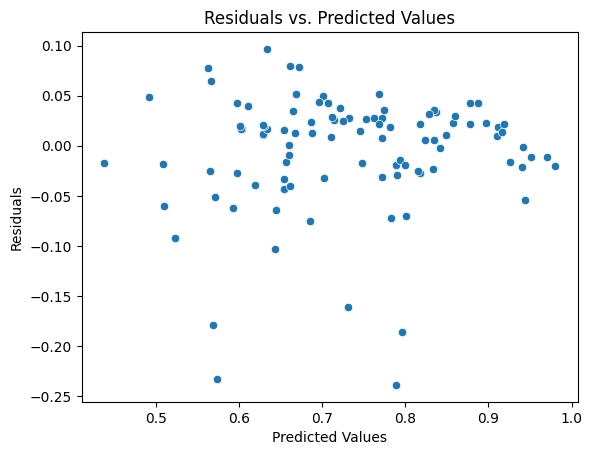

In [189]:
# 4. Checking for homscedasticity

sns.scatterplot(x = y_predict,y = residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

In [ ]:
# In this plot, the points appear to be somewhat randomly scattered around the zero line, although there might be a slight
# concentration in the middle and fewer points at the extremes. There isn't a very strong 'funnel' or 'cone'
# shape, which is good. This suggests that the assumption of homoscedasticity is largely met, or at least not severely violated. The spread of residuals seems relatively consistent across the range of predicted 'Chance of Admit' values.

# Combined with the earlier finding of non-normal residuals, this indicates that while the model's errors don't
# necessarily have a constant variance, their distribution is not perfectly normal. This might influence the
# reliability of statistical inferences, but for predictive accuracy,  model's performance (as indicated by R-squared)
# remains strong.

In [191]:
# In Summary:

# 1. Mean of Residuals - 0.84, which indicates the normality so assumptions met
# 2. Linearity - All the independent variables are having linear relationship with dependent variables.
# 3. Normality of the residuals - The residuals are not perfectly normally distributed and its right skewed
# 4. Homoskedasticity - Plot doesnt give the presence of it and hence the assumption met

## Implementing Linear Regression from Scratch

In [192]:
# Defining Linear Regression Class

class LinearRegression():
  def __init__(self,learning_rate,iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations

In [201]:
# Defining the predict function and assigning it under Linear Regression class

def predict(self,X):
  return np.dot(X, self.W) + self.b
LinearRegression.predict = predict

In [208]:
# Defining function for R-square and then assigning it to LR class

def r2_score(self, y_predict, y_true):
  # No need to call self.predict(X) here, as y_predict is directly provided
  rss = np.sum((y_true - y_predict)**2)
  tss = np.sum((y_true - np.mean(y_true)) **2)
  score = 1 - (rss/tss)
  return score
LinearRegression.r2_score = r2_score

In [196]:
# Updating the weights

def update_weights(self):
  y_predict = self.predict(self.X)
  # Calculating gradients
  dw = (-2/self.m) * np.dot(self.X.T,(self.y - y_predict))
  db = (-2/self.m) * np.sum(self.y - y_predict)
  # Updating weights
  self.W = self.W-self.learning_rate * dw
  self.b = self.b - self.learning_rate * db
LinearRegression.update_weights = update_weights

In [200]:
# Defining the fit model

def fit(self,X,Y):
  # number of training samples, number of features
  self.m,self.d = X.shape
  # weight initiatilization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.y = Y
  self.error_list = []
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    y_predict = X.dot(self.W) + self.b
    mse = np.mean((self.y - y_predict)**2)
    self.error_list.append(mse)
  return self
LinearRegression.fit = fit

In [203]:
# Initializing the customized LR function

custom_lr_model = LinearRegression(learning_rate = .01, iterations = 1000)

In [205]:
custom_lr_model.fit(X_train,y_train)
print("Custom Linear Regression model trained successfully.")

Custom Linear Regression model trained successfully.


In [210]:
# Make predictions using the custom model
y_predict_custom = custom_lr_model.predict(X_test)

# Evaluate the custom model using custom R2 score
# Now, directly pass y_predict_custom and y_test to the r2_score method
r2_custom = custom_lr_model.r2_score(y_predict_custom, y_test)

# Also calculate MAE, MSE, RMSE using sklearn's metrics for comparison
mae_custom = mean_absolute_error(y_test, y_predict_custom)
mse_custom = mean_squared_error(y_test, y_predict_custom)
rmse_custom = np.sqrt(mse_custom)

print(f"\n--- Custom Linear Regression Model Evaluation ---")
print(f"Custom R2 Score: {r2_custom:.4f}")
print(f"MAE: {mae_custom:.4f}")
print(f"MSE: {mse_custom:.4f}")
print(f"RMSE: {rmse_custom:.4f}")


--- Custom Linear Regression Model Evaluation ---
Custom R2 Score: 0.8206
MAE: 0.0403
MSE: 0.0035
RMSE: 0.0589


In [207]:
print(f"\nWeight coefficients from custom model: {np.round(custom_lr_model.W, 4)}")
print(f"Intercept from custom model: {np.round(custom_lr_model.b, 4)}")


Weight coefficients from custom model: [0.0209 0.0201 0.007  0.0032 0.0135 0.0692 0.0099]
Intercept from custom model: 0.7229


In [ ]:
# These metrics (R2, MAE, MSE, RMSE) are remarkably close to what you achieved with the sklearn.linear_model.LinearRegression.
# This is fantastic news! It means your scratch implementation of Linear Regression is working very accurately and effectively
# mirrors the performance of the professional library.

## Insights and Recommendations

### Insights from the Analysis:

** Predictors for Admission:**

1. CGPA is the strongest predictor: Our linear regression model shows that CGPA has the largest coefficient (around 0.07). This means that a higher undergraduate GPA significantly increases a student's 'Chance of Admit'.

2. GRE and TOEFL Scores are highly influential: Following CGPA, GRE and TOEFL scores are also strong positive predictors. Students with higher scores in these standardized tests tend to have a greater chance of admission.

3. Research Experience Matters: Having research experience (indicated by Research = 1) positively contributes to the 'Chance of Admit'. The model shows a clear advantage for students with research backgrounds.

4. University Rating, SOP, and LOR: While not as strong as CGPA, GRE, or TOEFL, these factors still show a positive influence. Students applying to higher-rated universities, and those with strong Statements of Purpose (SOP) and Letters of Recommendation (LOR), tend to have better chances.

5. Interconnectedness of Academic Performance: There's a strong positive correlation between GRE Score, TOEFL Score, and CGPA. This suggests that students who perform well in one academic area often perform well in others, creating a cumulative effect on their admission prospects.

6. Model Performance is Strong: Our linear regression model (both scikit-learn and your scratch implementation) achieved an R-squared of over 82%, with low MAE and RMSE on the original scale (around 0.04 and 0.05 respectively). This indicates that the model explains a significant portion of the variance in 'Chance of Admit' and makes accurate predictions.


7. Model Assumptions: Linearity & Homoscedasticity: These assumptions appear to be largely met, suggesting that a linear model is a reasonable fit for the relationships observed.

8. Normality of Residuals: The residuals were found to be non-normal (slightly heavier-tailed), which means while the model is good for prediction, the statistical inferences (like p-values for coefficients) might be less reliable.

### Recommendations

Recommendations:

For Aspiring Students:

 - Prioritize a High CGPA: This is the most critical factor for increasing admission chances. Focus on maintaining excellent academic performance throughout your undergraduate studies.

 - Excel in GRE and TOEFL: Strong scores in these standardized tests are essential and significantly boost your application.

 - Seek Research Opportunities: Gaining research experience can provide a notable advantage in the admissions process.

 - Craft Strong SOPs and Secure Good LORs: These components, along with applying to appropriate University Ratings, contribute positively and should not be overlooked.

For Model Improvement and Further Analysis:

 - Address Non-Normal Residuals: While the model is predictive, investigating and potentially addressing the non-normal residuals could improve the reliability of statistical inferences.

 This might involve:
 - Data Transformations: Experiment with transforming the 'Chance of Admit' variable or some independent variables (e.g., log, square root) to see if it helps normalize residuals.
 - Robust Regression: Consider robust regression techniques that are less sensitive to non-normal errors and outliers.
 - Explore Non-linear Relationships: Although linearity seems largely present, some relationships (e.g., with University Rating, SOP, LOR) might benefit from exploring polynomial terms or other non-linear modeling approaches to capture more nuanced patterns.
 - Feature Engineering: Consider creating new features from existing ones if there are logical combinations that could provide more predictive power.
 - Outlier Analysis: A more rigorous outlier analysis and treatment could be beneficial, even if only a few outliers were initially identified.